# Random Processes

Be sure to import Symbulate using the following commands.

In [2]:
from symbulate import *
%matplotlib inline

<a id='process'></a>

A **random process** (a.k.a. **stochastic process**) is an indexed collection of random variables defined on some probability space.  The index often represents "time", which can be either discrete or continuous.

The basic function for defining such objects in Symbulate is called `RandomProcess()`. We input into this function a random variable and 
a set of values to define our "time" indices. The `index_set` argument takes care of the latter and defaults to the `Naturals()`.

Like RV, RandomProcess only defines the random process.  Values of the process can be simulated using the usual simulation tools.  Since a stochastic process is a collection of random variables, many of the commands in other sections (Random variables, Multiple random variables, Conditioning) are useful when simulating stochastic processes.

For a given outcome in the probability space, a random process outputs a **sample path** which describes how the value of the process evolves over time for that particular outcome.  Calling `.plot()` for a RandomProcess will return a plot of sample paths.  The parameter `alpha` controls the weight of the line drawn in the plot.  The paramaters `tmin` and `tmax` control the range of time values in the display.

A future chapter of this book will dive further into the specifics of creating your own/using common random processes. For now we will look at the basic syntax for creating a random process, say a random walk. 

*Example.* A random walk, simulated 5 times.

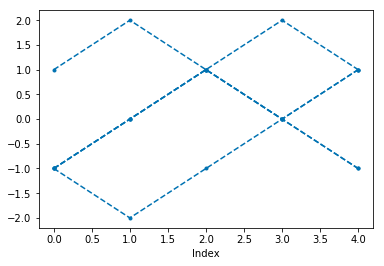

In [25]:
P = BoxModel([-1, 1], size=inf)
X = RV(P, cumsum)
Y = RandomProcess(X)
Y.sim(5).plot(alpha = 1, tmax = 5)

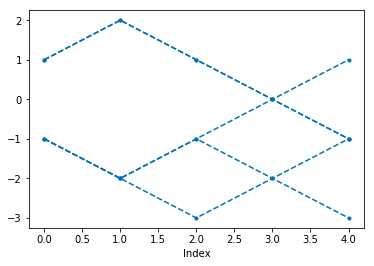

In [20]:
P = BoxModel([-1, 1], size=100)
X = RV(P)
Y = RandomProcess(P)
Y[0] = X[0]
for n in range(100):
    Y[n+1] = Y[n] + X[n]
    
Y.sim(5).plot(tmax = 5, alpha = 1)

Here we accomplished the same thing in two ways. 

We start by defining `P` - a probability space we will be drawing from during our random process. In a random walk each step either brings us forward or backwards by one position. We then create `X` - a random variable that draws one infinite set of 1 and -1's and calculates the cumulative sum after each step. The `cumsum` function allows us to do this in the first attempt. In the second attempt we show how this could be done without the use of such a function. We are also able to apply any function to the values at each step of our process by defining a function and inputing it to the `func=` argument of `RandomProcess`. If values are not cumulative/related to time this may not be necissary. 

Below we simulate and plot many sample paths, specifying the range of $t$ values to plot.  Note that the darkness of a path represents its relative likelihood.

*On your own:* Try changing the value of alpha to 1. Is it easier or harder to tell which paths have higher probabilities?

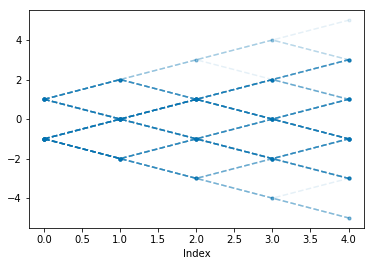

In [24]:
Y.sim(100).plot(tmin = 0, tmax=5, alpha = .1)

### Mean function

The mean function of a stochastic process $X(t)$ is a deterministic function which maps $t$ to $E(X(t))$.  The mean function can be estimated and plotted by simulating many sample paths of the process and using `.mean()`.

(0.6, 0.4, 0.2, 0.4, 0.6, 0.0, ...)

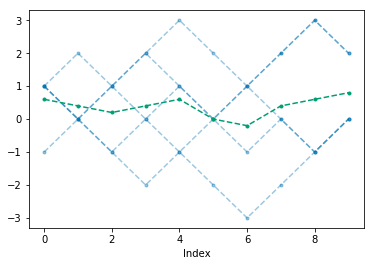

In [26]:
paths = Y.sim(5)
plot(paths)
plot(paths.mean())
vecmean = paths.mean()
vecmean